# Load data

In [1]:
sys.path.append("../common")
from io_manager import Load
loader = Load(
    in_path = "../../results/ana_test"
)

[Load] ✅ Initialised


In [2]:
results_from_pickle = loader.load_all_pkl() # Useful backup
results_from_persistent = loader.load_all() # Should also use ROOT files for events and histograms

[Load] ✅ Successfully loaded results from ../../results/ana_test/results.pkl
[Load] ✅ Successfully loaded hists from ../../results/ana_test/events.parquet
[Load] ✅ Loaded histograms from ../../results/ana_test/hists.h5
[Load] ✅ Loaded cut stats from ../../results/ana_test/stats.csv
[Load] ✅ Loaded info from ../../results/ana_test/info.txt


In [3]:
results = results_from_persistent

## Analyse results

### Cut flow

In [4]:
display(results["stats"])

,Cut,Events Passing,Absolute Frac. [%],Relative Frac. [%],Description
0,No cuts,5754129,100.00,100.00,No selection applied
1,is_reco_electron,5351815,93.01,93.01,Electron track fits
2,has_trk_front,5246599,91.18,98.03,Tracks intersect tracker entrance
3,good_trkqual,985883,17.13,18.79,Track fit quality > 0.8
4,is_downstream,675042,11.73,68.47,Downstream tracks (p_z > 0 at tracker entrance)
5,has_hits,673612,11.71,99.79,>20 active tracker hits
6,within_d0,133000,2.31,19.74,Distance of closest approach (d_0 < 100 mm)
7,within_pitch_angle,69885,1.21,52.55,Extrapolated pitch angle (0.557735 < tan(theta...
8,within_lhr_max,55915,0.97,80.01,Loop helix maximum radius (450 < R_max < 680 mm)
9,is_truth_electron,35469,0.62,63.43,Track parents are electrons (truth PID)


### Histograms

[Plot] ⭐️ Initialised


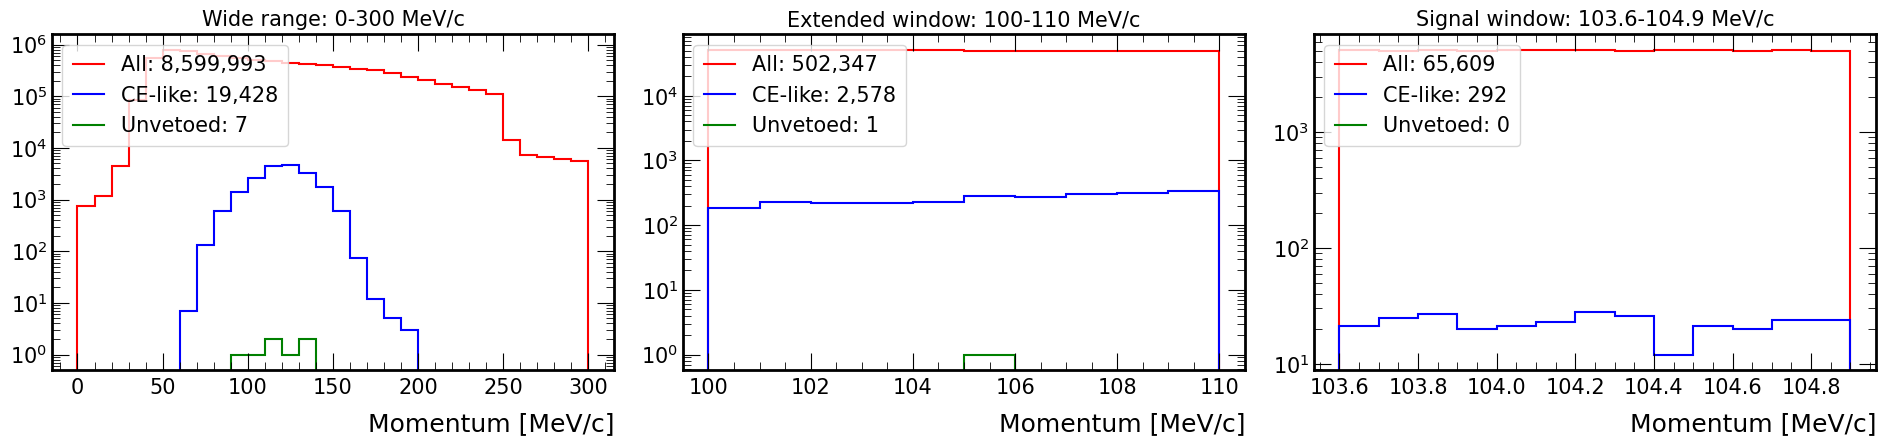

In [8]:
from draw import Draw
draw = Draw()

draw.plot_mom_windows(results_from_pickle["hists"], out_path=None)

/home/sgrant/.conda/envs/ana_v2.2.0/lib/python3.12/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


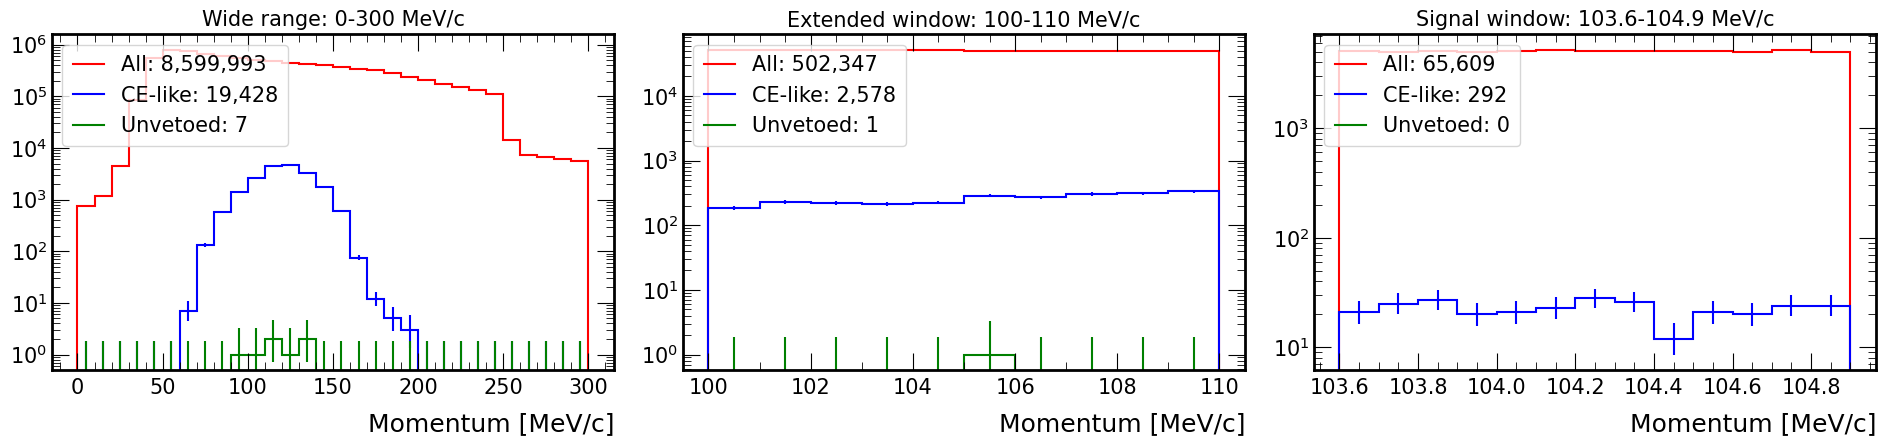

In [10]:
draw.plot_mom_windows(results["hists"], out_path=None)

Interesting, the version from h5 insists on using error bars? 

/home/sgrant/.conda/envs/ana_v2.2.0/lib/python3.12/site-packages/hist/basehist.py:444: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


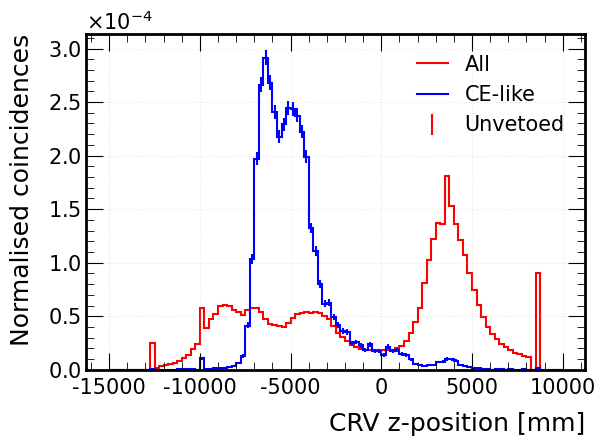

In [12]:
draw.plot_crv_z(results["hists"], out_path=None)

/home/sgrant/.conda/envs/ana_v2.2.0/lib/python3.12/site-packages/hist/basehist.py:444: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


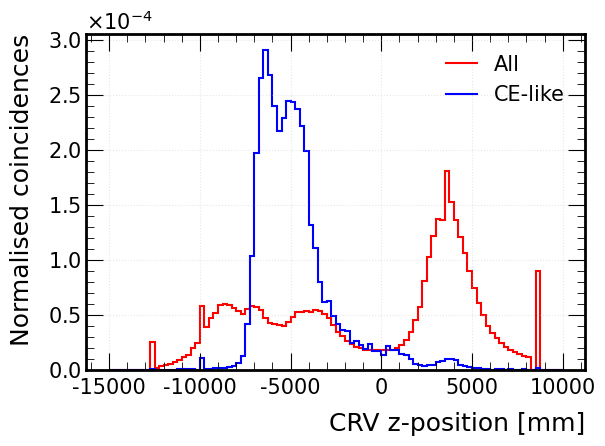

In [13]:
draw.plot_crv_z(results_from_pickle["hists"], out_path=None)

And it wants to use the full selection, ignoring my slice command

### Efficiency 

In [6]:
from efficiency import Efficiency 
from pyutils.pylogger import Logger

logger = Logger()
eff = Efficiency()

# This should be in postprocessing right? 
# Is this not a crucial thing? 
# Should also use subprocess to get the number of generated events / dataset
def get_eff_from_hists(hists, out_path=None):
    logger.log(f"Efficiency from histograms:", "info")
    df_eff = eff.get_eff_from_hists(hists, N_gen=4e6, veto=True, wilson=True)
    df_eff.round(3).to_csv(out_path, index=False)
    display(df_eff)
    logger.log(f"Wrote {out_path}", "success")
    return df_eff
    
df_eff_from_hist = get_eff_from_hists(results["hists"])

[Efficiency] ⭐️ Initialised
[pylogger] ⭐️ Efficiency from histograms:
[Efficiency] ⭐️ Getting efficiency from histogams
[Efficiency] ✅ Returning efficiency information


,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),19428,4000000,0.48570,0.003476
1,Signal (ext),2578,4000000,0.06445,0.001269
2,Signal (sig),292,4000000,0.00730,0.000427
3,Veto (wide),7,19428,99.96397,0.013856
4,Veto (ext),1,2578,99.96121,0.043345
5,Veto (sig),0,292,100.00000,0.170648


[pylogger] ✅ Wrote None


In [7]:
# df_eff_from_hist = get_eff_from_hists(results_from_pickle["hists"])

### Background event info

In [12]:
print(results["info"])

  Index:            64
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  59076.573926
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            168
  Subrun:           [18802]
  Event:            [50292]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015287.root
  Track time [ns]:  86861.975560
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            190
  Subrun:           [19742]
  Event:            [359830]
  File:             nts.mu2e.CosmicCRYSignalAllOffSpillTriggered-LH.MDC2020as_best_v1_3_v06_03_00.001202_00015581.root
  Track time [ns]:  31331.604162
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            298
  Subrun: 

In [13]:
from pyutils.pyprint import Print
printer = Print()
printer.print_n_events(results["events"])

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 1 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 4846
evt.event: 283585
crv.crvcoincs.time: []
crv.crvcoincs.nHits: []
crv.crvcoincs.pos.fCoordinates.fZ: []
is_reco_electron: [True, False, False, False]
at_trk_front: [[False, False, False, False, False, False, True, False, False], ..., [...]]
has_trk_front: [True, True, True, True]
good_trkqual: [True, False, True, False]
is_downstream: [True, False, True, False]
has_hits: [True, True, True, True]
within_d0: [True, True, True, True]
within_pitch_angle: [True, False, True, False]
within_lhr_max: [True, False, True, False]
is_truth_electron: [True, True, True, True]
one_reco_electron: [True, True, True, True]
one_reco_electron_per_event: True
unvetoed: [True, True, True, True]
within_ext_win: [False, False, False, False]
within_sig_win: [False, False, False, False]
CE_li